<a href="https://colab.research.google.com/github/tanyaryabov/ML/blob/master/Content_Based_Netflix_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

derm_problem1_2

In [97]:

from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive  Shareddrives


In [98]:
DATA_PATH= '/content/drive/MyDrive/netflix_titles.csv'


In [99]:

import pandas as pd
import matplotlib.pyplot as plt

#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
print(df.shape)
df.head()

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


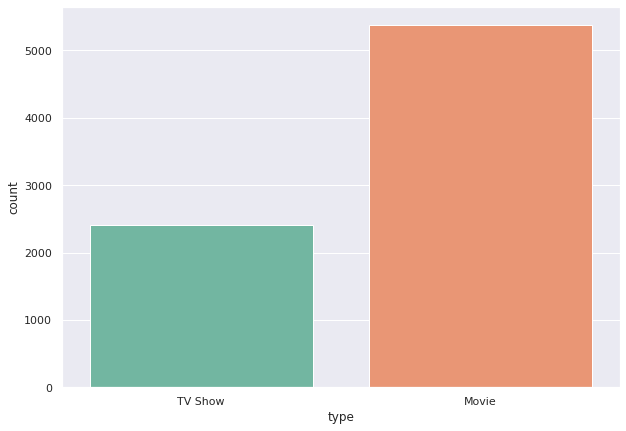

In [100]:
#Analyze TV shows vs Movies
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

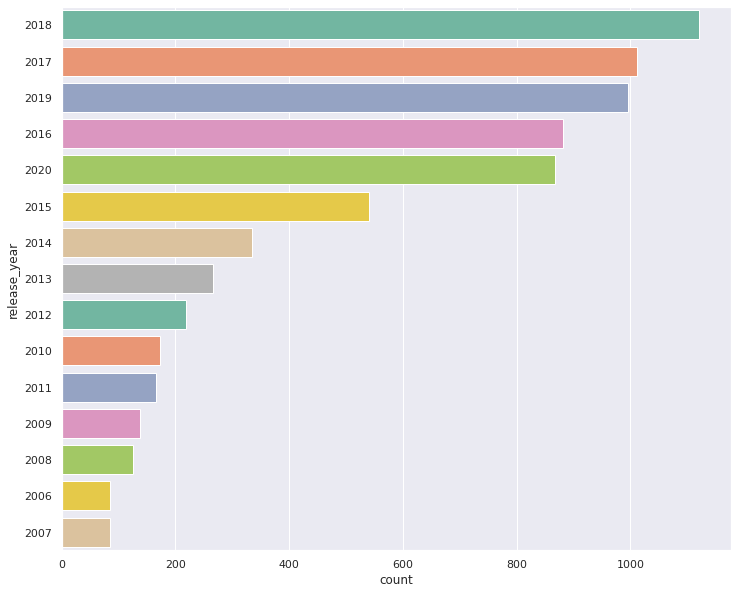

In [101]:
#Year Analisys
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data=df, palette="Set2", order=df['release_year'].value_counts().index[0:15])


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Retaining only Relevant Columns
df.drop(columns=['director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'type'], inplace=True)
df.head()

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(7787, 17905)

In [ ]:
tfidf.get_feature_names()[5000:5010]

In [74]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape
cosine_sim[1]

array([0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
       0.        ])

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
indices[:50]

In [86]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [95]:
get_recommendations('Bridgerton')

3098                     Jack Taylor
7572            What's Up With Love?
2509                Graceful Friends
6540                      The L Word
3007                         Inmates
472     American Pie 9: Girls' Rules
524           Angry Indian Goddesses
712               Bana Masal Anlatma
4048            Merry Happy Whatever
3576    LEGENDS OF THE HIDDEN TEMPLE
Name: title, dtype: object

In [96]:
get_recommendations('Fauda')

5946                              Sword Master
4278                            Mumbai Matinee
5016                     Pyaar Ke Side Effects
4497                                     Nobel
3106                            Jacob's Ladder
6993    The Wedding Party 2: Destination Dubai
7477                         War Chhod Na Yaar
2903                            I Am Vengeance
6895                                   The Spy
6728                                 The Other
Name: title, dtype: object